# Fake News Detection using NaiveBayes

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Read the data

In [2]:
df=pd.read_csv('news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [5]:
 fake_set = df.loc[df['label'] == 'FAKE']
#fake_set = df.loc[df['label']]
 real_set = df.loc[df['label'] == 'REAL']
#real_set = df.loc[df['label']]
print(fake_set.count())
print(real_set.count())

Unnamed: 0    3164
title         3164
text          3164
label         3164
dtype: int64
Unnamed: 0    3171
title         3171
text          3171
label         3171
dtype: int64


# Split the dataset

In [6]:
train_set = pd.concat([fake_set[0:2199],real_set[0:2199]])
test_set = pd.concat([fake_set[2200:],real_set[2200:]])
print(train_set.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
5    \nI’m not an immigrant, but my grandparents ...  FAKE  
6  Share This Baylee Luciani (left), Screenshot o...  FAKE  


# Initialize a TfidfVectorizer

In [7]:
tfidf_vectorizer = TfidfVectorizer( max_features=2000000, stop_words='english', min_df=0.002, max_df=0.5, 
                                   use_idf=True, ngram_range=(1,3))

In [8]:
tv = tfidf_vectorizer.fit(train_set['text'])
%time train_tfidf_matrix = tv.transform(train_set['text'])
ch2 = SelectKBest(chi2, k='all')
train_set_selected = ch2.fit_transform(train_tfidf_matrix, train_set['label'])

Wall time: 13 s


# Initialize a NaiveBayes

In [9]:
%time model1 = MultinomialNB().fit(train_tfidf_matrix, train_set['label'])
%time model2 = MultinomialNB().fit(train_set_selected, train_set['label'])

Wall time: 49 ms
Wall time: 25.3 ms


In [10]:
test_tfidf_matrix = tv.transform(test_set['text'])
test_set_selected = ch2.transform(test_tfidf_matrix)

In [11]:
all_predictions1 = model1.predict(test_tfidf_matrix)
all_predictions2 = model2.predict(test_set_selected)

# Predict on the test set and calculate accuracy

In [12]:
print('accuracy of model1 {}'.format(accuracy_score(test_set['label'], all_predictions1)))
print('accuracy of model2 {}'.format(accuracy_score(test_set['label'], all_predictions2)))

accuracy of model1 0.9049095607235143
accuracy of model2 0.9049095607235143


# Creating the Confusion Matrix

In [13]:
cm = confusion_matrix(test_set['label'],all_predictions1)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_set['label'],all_predictions1)
print(report)


             precision    recall  f1-score   support

       FAKE       0.92      0.88      0.90       964
       REAL       0.89      0.92      0.91       971

avg / total       0.91      0.90      0.90      1935



In [14]:
count_vectorizer = CountVectorizer( max_features=200000, stop_words='english', min_df=0.002, max_df=0.5, ngram_range=(1,3))
count_vectorizer = count_vectorizer.fit(train_set['text'])
%time train_count_matrix = count_vectorizer.transform(train_set['text'])

Wall time: 13 s


In [15]:
top = SelectKBest(chi2, k='all')
train_set_selected2 = top.fit_transform(train_count_matrix, train_set['label'])

In [16]:
%time model2 = MultinomialNB().fit(train_set_selected2, train_set['label'])

Wall time: 52 ms


In [17]:
test_count_matrix = count_vectorizer.transform(test_set['text'])
test_set_selected2 = top.transform(test_count_matrix)
all_predictions2 = model2.predict(test_set_selected2)

In [18]:
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions2)))
print('confusion matrix\n {}'.format(confusion_matrix(test_set['label'], all_predictions2)))
print('(row=expected, col=predicted)')

accuracy 0.8997416020671835
confusion matrix
 [[863 101]
 [ 93 878]]
(row=expected, col=predicted)


In [19]:
plt.matshow(confusion_matrix(test_set['label'], all_predictions2), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

Text(0.5,0,'predicted label')

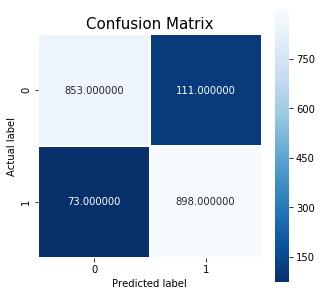

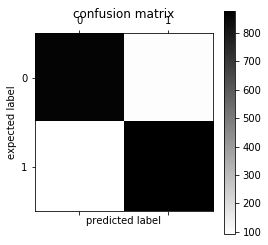

             precision    recall  f1-score   support

       FAKE       0.90      0.90      0.90       964
       REAL       0.90      0.90      0.90       971

avg / total       0.90      0.90      0.90      1935



In [20]:
# Creating the Confusion Matrix
cm = confusion_matrix(test_set['label'],all_predictions2)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_set['label'],all_predictions2)
print(report)
